In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale
from matplotlib.colors import rgb2hex
import mapclassify
import adjustText as aT
import matplotlib as mpl


# incorporamos geopandas! geografía + pandas :)
import geopandas as gpd
from sklearn.preprocessing import normalize

%matplotlib inline
sns.set(context='notebook', font='Fira Sans', style='white', palette='plasma')

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
def reverse_colourmap(cmap, name = 'my_cmap_r'):
    """
    In: 
    cmap, name 
    Out:
    my_cmap_r

    Explanation:
    t[0] goes from 0 to 1
    row i:   x  y0  y1 -> t[0] t[1] t[2]
                   /
                  /
    row i+1: x  y0  y1 -> t[n] t[1] t[2]

    so the inverse should do the same:
    row i+1: x  y1  y0 -> 1-t[0] t[2] t[1]
                   /
                  /
    row i:   x  y1  y0 -> 1-t[n] t[2] t[1]
    """        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

In [3]:
dataProsupuestoMunicipal = pd.read_excel('data/datos_municipales_Disponibilidad_Presupuesto_PerCapita.xls')
dataProsupuestoMunicipal.head()

,CODIGO,MUNICIPIO,IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018
0,1101,IQUIQUE,326.93
1,1107,ALTO HOSPICIO,113.47
2,1401,POZO ALMONTE,509.29
3,1402,CAMIÑA,1772.93
4,1403,COLCHANE,1126.58


In [4]:
codigoRegion=5

In [5]:
dataPobreza = pd.read_excel('data/Indice_Pobreza_Porcentaje_Casem2018.xlsx')
dataPobreza.head()

,CODIGO,MUNICIPIO,Indice_Pobreza_Porcentaje_Casem2018
0,1101,IQUIQUE,5.33
1,1107,ALTO HOSPICIO,8.51
2,1401,POZO ALMONTE,10.33
3,1402,CAMIÑA,34.87
4,1403,COLCHANE,23.96


In [6]:
zonas_eod = gpd.read_file('data/Comunas', encoding="utf-8",converters={'cod_comuna':str})
zonas_eod = zonas_eod[zonas_eod.cod_comuna != 5104]
zonas_eod = zonas_eod[zonas_eod.cod_comuna != 5201]
zonas_eod.head(3)

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621...."


In [7]:
dataset = pd.merge(zonas_eod, dataPobreza, left_on='cod_comuna',right_on='CODIGO',how='inner') 
dataset = pd.merge(dataset, dataProsupuestoMunicipal, left_on='cod_comuna',right_on='CODIGO',how='inner') 
dataset.head(3)

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,CODIGO_x,MUNICIPIO_x,Indice_Pobreza_Porcentaje_Casem2018,CODIGO_y,MUNICIPIO_y,IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731....",6204,MARCHIHUE,12.52,6204,MARCHIHUE,409.77
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596....",6102,CODEGUA,14.15,6102,CODEGUA,220.92
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621....",6103,COINCO,15.59,6103,COINCO,309.21


In [8]:
dataset[['Indice_Pobreza_Porcentaje_Casem2018']].describe()

,Indice_Pobreza_Porcentaje_Casem2018
count,343.000000
mean,17.260466
std,9.467027
min,0.030000
25%,10.155000
50%,15.840000
75%,22.760000
max,50.240000


/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


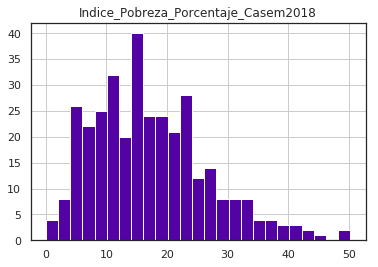

In [9]:
hist = dataset[['Indice_Pobreza_Porcentaje_Casem2018']].hist(bins=25)

In [10]:
dataset[dataset['Comuna']=='Puente Alto'].head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,CODIGO_x,MUNICIPIO_x,Indice_Pobreza_Porcentaje_Casem2018,CODIGO_y,MUNICIPIO_y,IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018
118,292,48961.65484,12,7,13201,13,1.269446e+08,58874.136921,Región Metropolitana de Santiago,Puente Alto,Cordillera,"POLYGON ((-7848546.332 -3968052.875, -7848478....",13201,PUENTE ALTO,8.02,13201,PUENTE ALTO,136.0


In [11]:
codigoRegion=13
#nombreProvincia='Santiago'
datasetRegion=dataset[dataset['codregion']==codigoRegion]
#datasetRegion=dataset[dataset['Provincia']==nombreProvincia]
#datasetRegion=[datasetRegion,dataset[dataset['Comuna']=='Puente Alto']]
#datasetRegion=pd.concat(datasetRegion)
datasetRegion.head(200)


,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,CODIGO_x,MUNICIPIO_x,Indice_Pobreza_Porcentaje_Casem2018,CODIGO_y,MUNICIPIO_y,IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018
26,330,13987.326781,10,7,13129,13,1.424341e+07,16812.167615,Región Metropolitana de Santiago,San Joaquín,Santiago,"POLYGON ((-7861762.687 -3958307.095, -7861708....",13129,SAN JOAQUÍN,6.60,13129,SAN JOAQUÍN,327.85
36,331,13311.641304,13,7,13130,13,1.389538e+07,15988.816037,Región Metropolitana de Santiago,San Miguel,Santiago,"POLYGON ((-7863229.775 -3964360.652, -7863319....",13130,SAN MIGUEL,3.46,13130,SAN MIGUEL,220.04
47,332,11733.486710,13,7,13131,13,9.056280e+06,14061.528858,Región Metropolitana de Santiago,San Ramón,Santiago,"POLYGON ((-7863398.118 -3964354.273, -7863319....",13131,SAN RAMÓN,9.41,13131,SAN RAMÓN,134.23
56,309,11488.695747,9,7,13108,13,1.068637e+07,14088.417488,Región Metropolitana de Santiago,Independencia,Santiago,"POLYGON ((-7865631.125 -3948404.075, -7865643....",13108,INDEPENDENCIA,9.85,13108,INDEPENDENCIA,190.60
60,310,12797.595762,13,7,13109,13,1.454185e+07,15442.412755,Región Metropolitana de Santiago,La Cisterna,Santiago,"POLYGON ((-7865040.615 -3968217.521, -7865077....",13109,LA CISTERNA,3.63,13109,LA CISTERNA,166.32
67,323,36618.971695,11,7,13122,13,7.709271e+07,43954.336968,Región Metropolitana de Santiago,Peñalolén,Santiago,"POLYGON ((-7852667.025 -3963533.211, -7852700....",13122,PEÑALOLÉN,4.75,13122,PEÑALOLÉN,293.89
81,324,16072.408276,10,7,13123,13,2.073083e+07,19223.740933,Región Metropolitana de Santiago,Providencia,Santiago,"POLYGON ((-7857468.292 -3952687.257, -7857424....",13123,PROVIDENCIA,0.74,13123,PROVIDENCIA,831.99
85,314,23724.899355,11,7,13113,13,3.361510e+07,28343.661508,Región Metropolitana de Santiago,La Reina,Santiago,"POLYGON ((-7852374.608 -3952376.018, -7852375....",13113,LA REINA,2.34,13113,LA REINA,296.63
89,295,44852.016431,14,7,13403,13,1.056188e+08,54017.559247,Región Metropolitana de Santiago,Calera de Tango,Maipo,"POLYGON ((-7877355.549 -3971828.617, -7877326....",13403,CALERA DE TANGO,2.76,13403,CALERA DE TANGO,352.20
108,288,172581.447530,8,7,13301,13,1.386968e+09,206660.187466,Región Metropolitana de Santiago,Colina,Chacabuco,"POLYGON ((-7879353.625 -3919889.834, -7879390....",13301,COLINA,12.56,13301,COLINA,342.13


In [12]:
datasetRegion.describe()


,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,CODIGO_x,Indice_Pobreza_Porcentaje_Casem2018,CODIGO_y,IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018
count,52.000000,52.000000,52.00000,52.0,52.000000,52.0,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000
mean,658.711538,66006.686872,11.25000,7.0,13238.076923,13.0,4.279238e+08,79441.393642,13238.076923,7.540769,13238.076923,296.536346
std,2488.482720,80337.604929,2.26547,0.0,178.051309,0.0,1.065712e+09,96685.368678,178.051309,3.683568,178.051309,211.202146
min,288.000000,10795.433316,8.00000,7.0,13101.000000,13.0,9.056280e+06,12827.159439,13101.000000,0.030000,13101.000000,123.130000
25%,300.750000,15950.522176,9.00000,7.0,13113.750000,13.0,2.006871e+07,19784.416972,13113.750000,5.300000,13113.750000,165.677500
50%,314.500000,35927.946164,11.00000,7.0,13126.500000,13.0,7.931036e+07,43040.828641,13126.500000,7.855000,13126.500000,234.135000
75%,327.250000,87133.844224,14.00000,7.0,13401.250000,13.0,2.926474e+08,104754.580719,13401.250000,10.270000,13401.250000,331.357500
max,18258.000000,483095.202852,14.00000,7.0,13605.000000,13.0,7.223837e+09,582995.722046,13605.000000,14.540000,13605.000000,1008.340000


In [13]:
datasetRegion[datasetRegion['Comuna']=='Puente Alto'].head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry,CODIGO_x,MUNICIPIO_x,Indice_Pobreza_Porcentaje_Casem2018,CODIGO_y,MUNICIPIO_y,IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018
118,292,48961.65484,12,7,13201,13,1.269446e+08,58874.136921,Región Metropolitana de Santiago,Puente Alto,Cordillera,"POLYGON ((-7848546.332 -3968052.875, -7848478....",13201,PUENTE ALTO,8.02,13201,PUENTE ALTO,136.0


In [14]:
datasetRegion["center"] = datasetRegion["geometry"].centroid
datasetRegion_points = datasetRegion.copy()
datasetRegion_points.set_geometry("center", inplace = True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
datasetRegion[['cod_comuna', 'Comuna']].values

array([[13129, 'San Joaquín'],
       [13130, 'San Miguel'],
       [13131, 'San Ramón'],
       [13108, 'Independencia'],
       [13109, 'La Cisterna'],
       [13122, 'Peñalolén'],
       [13123, 'Providencia'],
       [13113, 'La Reina'],
       [13403, 'Calera de Tango'],
       [13301, 'Colina'],
       [13101, 'Santiago'],
       [13302, 'Lampa'],
       [13202, 'Pirque'],
       [13201, 'Puente Alto'],
       [13107, 'Huechuraba'],
       [13401, 'San Bernardo'],
       [13503, 'Curacaví'],
       [13504, 'María Pinto'],
       [13102, 'Cerrillos'],
       [13103, 'Cerro Navia'],
       [13132, 'Vitacura'],
       [13104, 'Conchalí'],
       [13105, 'El Bosque'],
       [13106, 'Estación Central'],
       [13110, 'La Florida'],
       [13111, 'La Granja'],
       [13112, 'La Pintana'],
       [13114, 'Las Condes'],
       [13115, 'Lo Barnechea'],
       [13116, 'Lo Espejo'],
       [13117, 'Lo Prado'],
       [13118, 'Macul'],
       [13119, 'Maipú'],
       [13120, 'Ñuñoa'],
  

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Fira Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Fira Sans'] not found. Falling back to 

1

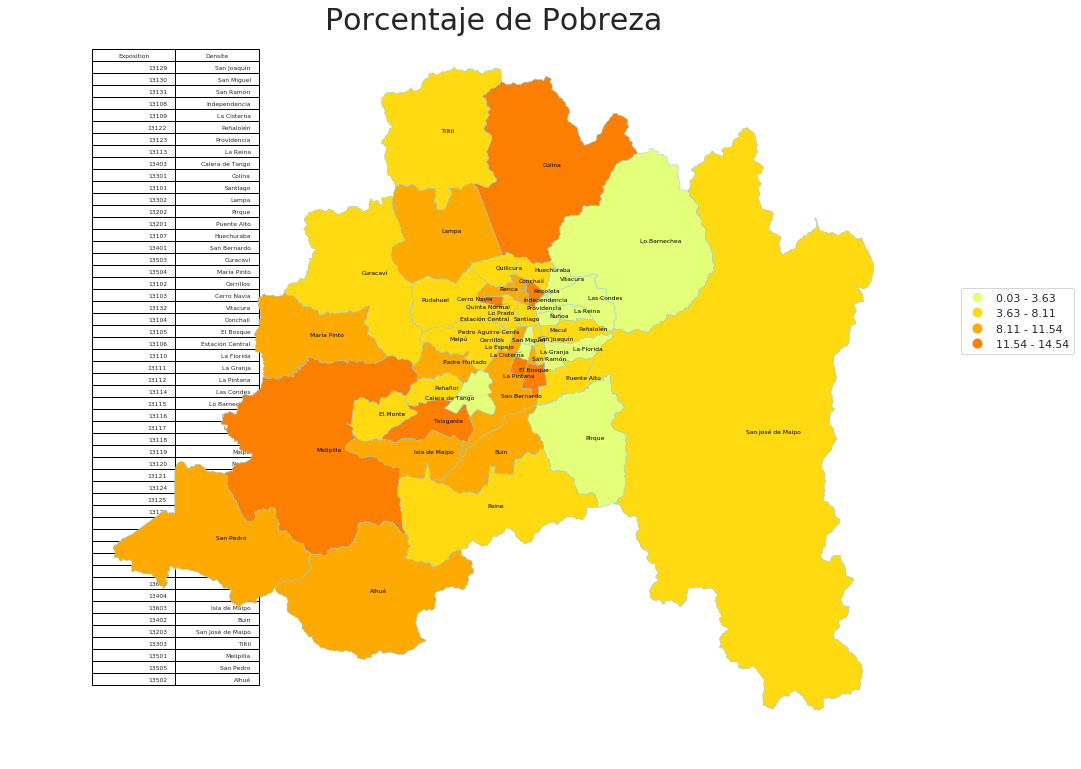

In [33]:
ax = datasetRegion.plot(figsize=(15, 15), column='Indice_Pobreza_Porcentaje_Casem2018', 
                         cmap='Wistia', legend=True, linewidth=0.5, 
                         edgecolor='#87CEEB', scheme='Fisher_Jenks', k=4)

plt.title('Porcentaje de Pobreza', fontsize=30)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))



#text=datasetRegion[['cod_comuna', 'Comuna']].values
#colLabels = ["Exposition", u"Densite"]
#tab = ax.table(cellText=text, colLabels=colLabels, colWidths = [0.1,0.1],    loc='upper left')
#plt.show()

ax.set_axis_off()

texts = []
for x, y, label in zip(datasetRegion_points.geometry.x, datasetRegion_points.geometry.y, datasetRegion_points["Comuna"]):
    texts.append(plt.text(x, y, label, fontsize = 6,color='black'))

aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0), arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
#aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0))

1

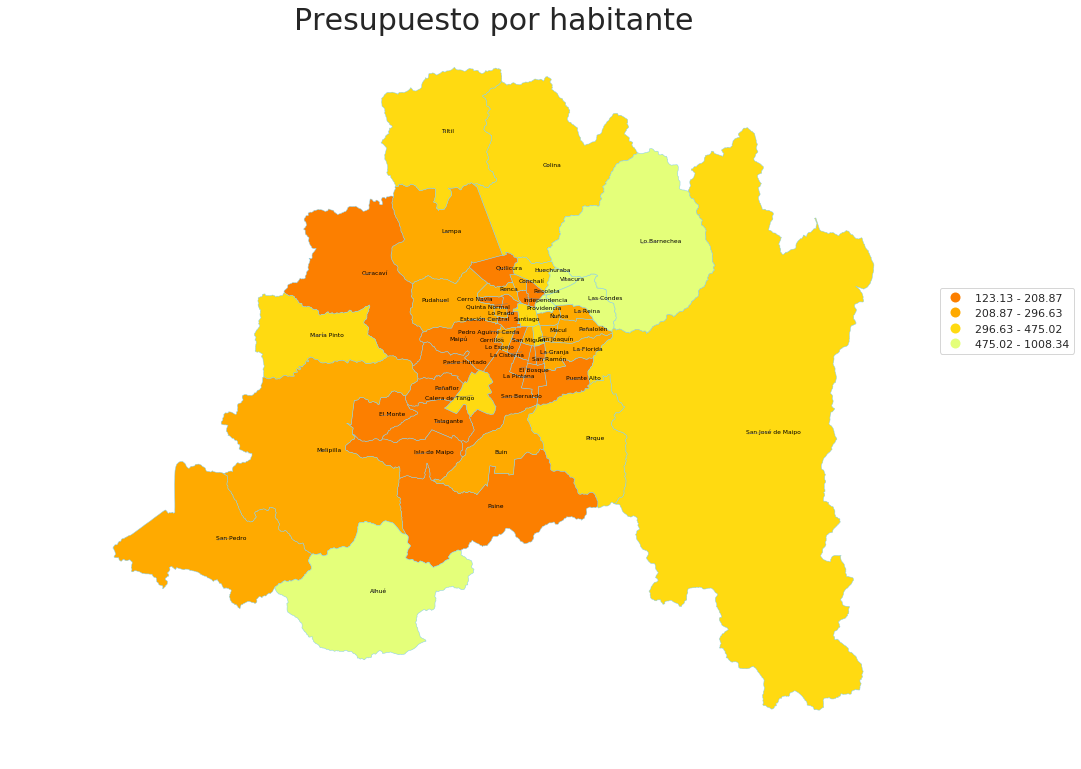

In [21]:
cmap = mpl.cm.Wistia
cmap_r = reverse_colourmap(cmap)

ax = datasetRegion.plot(figsize=(15, 15), column='IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018', 
                         cmap=cmap_r, legend=True, linewidth=0.5, 
                         edgecolor='#87CEEB', scheme='Fisher_Jenks', k=4)

plt.title('Presupuesto por habitante', fontsize=30)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))


ax.set_axis_off()

texts = []
for x, y, label in zip(datasetRegion_points.geometry.x, datasetRegion_points.geometry.y, datasetRegion_points["Comuna"]):
    texts.append(plt.text(x, y, label, fontsize = 6,color='black'))

aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0), arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
#aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0))